In [19]:
import yaml
import pandas as pd
from utils.data_preprocessor import DataPreprocessor

with open('../config.yaml', 'r') as config_file:
    config = yaml.safe_load(config_file)

testing_file_path: str = "../data/NIO_time_series.csv"

test_df = pd.read_csv(testing_file_path)
lookback_period: int = config["data"]["lookback_period"]
target_column: str = config["data"]["target_column"]
validation_size: float = config["data"]["validation_size"]
trend_length: int = config["data"]["trend_length"]

test_processor = DataPreprocessor(test_df,lookback_period, target_column, validation_size, trend_length)

X_test = test_processor.X_testing_scaled
y_test = test_processor.y_batched

print("Testing Dataset shape:", test_df.shape)
print("Testing Dataset as time series batches:",X_test.shape, y_test.shape)

Testing Dataset shape: (5000, 30)
Testing Dataset as time series batches: (4970, 20, 30) (4970,)


In [20]:
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from keras.models import load_model

model = load_model("../models/saved models/trained_StockTrendLSTM_model.keras")

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, \nTest Accuracy: {test_accuracy * 100:.2f}%")

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

y_actual = y_test
element_counts = Counter(y_actual)

for element, count in element_counts.items():
    print(f"{element}: {count} occurrences")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

results_df = pd.DataFrame({'Actual': y_actual, 'Predicted': y_pred.flatten(), 'Predicted_Prob': y_pred_prob.flatten()})
results_df

156/156 [==============================] - 1s 3ms/step - loss: 0.0178 - accuracy: 1.0000
Test Loss: 0.0178, 
Test Accuracy: 100.00%
156/156 [==============================] - 1s 3ms/step
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
AUC-ROC: 1.0000
1: 2239 occurrences
0: 2731 occurrences


,Actual,Predicted,Predicted_Prob
0,1,1,0.999374
1,1,1,0.999394
2,1,1,0.999291
3,1,1,0.999484
4,1,1,0.999485
5,1,1,0.999476
6,1,1,0.998541
7,0,0,0.005094
8,0,0,0.001335
9,0,0,0.000805


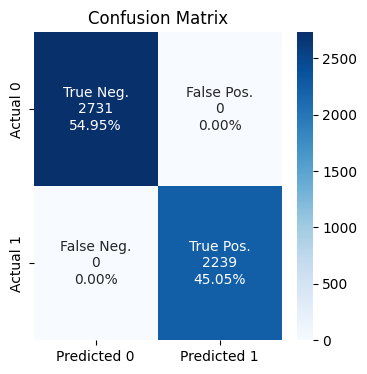

In [21]:
from utils.visualizing_service import plot_confusion_matrix
plot_confusion_matrix(y_test, y_pred)